# A) Beta–Binomial (coin flips)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 0 seconds.


<Axes: title={'center': 'p'}>

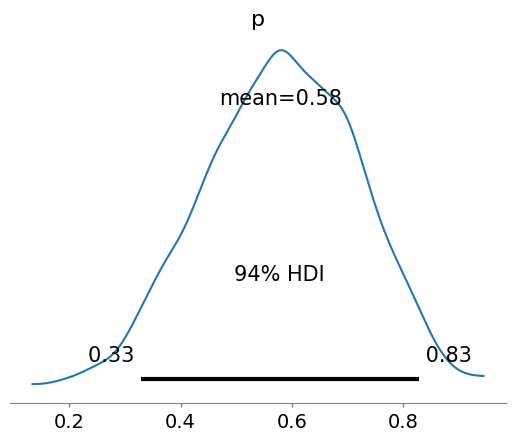

In [4]:
import pymc as pm
import arviz as az

h, t = 5, 3  #random values

with pm.Model() as coin_model:
    p = pm.Beta("p", alpha=2, beta=2)
    y_obs = pm.Binomial("y_obs", n=h+t, p=p, observed=h)
    data = pm.sample(2000, tune=1000, target_accept=0.9)

az.plot_posterior(data, var_names=["p"])


# B) Poisson–Gamma with exposure (synthetic teaching example)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lam]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 0 seconds.


<Axes: title={'center': 'lam'}>

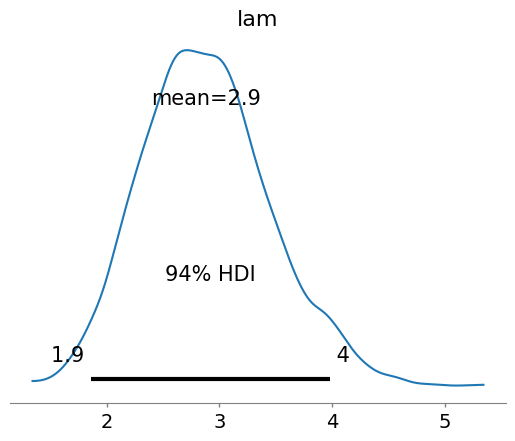

In [5]:
import numpy as np

y = np.array([2,3,4,1,2,3,4,5]) #some random
n = len(y)

with pm.Model() as poisson_model:
    lam = pm.Gamma("lam", alpha=2, beta=1)
    obs = pm.Poisson("obs", mu=lam, observed=y)
    data = pm.sample(2000, tune=1000, target_accept=0.9)

az.plot_posterior(idata, var_names=["lam"])
